# Marvel vs DC: Análisis de Datos

### Introducción
Este notebook analiza datos de las franquicias de Marvel y DC, centrándose en características como ingresos en taquilla, calificaciones de críticos y datos relacionados con el rendimiento de películas.

**Mejoras realizadas:**
- Separación de las celdas para cada etapa del análisis (importación, carga, limpieza, visualización, etc.).
- Comentarios añadidos para mayor claridad.
- Corrección de errores de sintaxis y formato.
- Importación de librerías básicas en una única celda.
- Inclusión de una lista de requisitos (`requirements.txt`).

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de datos

In [41]:
df = pd.read_csv('CSV/Marvel_DC.csv',encoding='utf-8')

### Limpieza de datos

In [42]:
df.isnull().sum()


ID              0
film            0
Year           14
Genre           7
RunTime         0
Description     0
IMDB_Score      0
Value_IMDB      0
dtype: int64

 ### Vista preliminar de los datos

In [33]:
df.head()

,ID,film,Year,Genre,RunTime,Description,IMDB_Score,Value_IMDB
0,0,Eternals,-2021,"Action,Adventure,Drama",0,"The saga of the Eternals, a race of immortal b...",0.0,Bad
1,1,Loki,(2021–2023),"Action,Adventure,Fantasy",0,A new Marvel chapter with Loki at its center.,0.0,Bad
2,2,The Falcon and the Winter Soldier,-2021,"Action,Adventure,Drama",50 min,"Following the events of 'Avengers: Endgame,' S...",7.5,Good
3,3,WandaVision,(2021),"Action,Comedy,Drama",350 min,Blends the style of classic sitcoms with the M...,8.1,Good
4,4,Spider-Man: No Way Home,-2021,"Action,Adventure,Sci-Fi",0,A continuation of Spider-Man: Far From Home.,0.0,Bad


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           384 non-null    int64  
 1   film         384 non-null    object 
 2   Year         370 non-null    object 
 3   Genre        377 non-null    object 
 4   RunTime      384 non-null    object 
 5   Description  384 non-null    object 
 6   IMDB_Score   384 non-null    float64
 7   Value_IMDB   384 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 24.1+ KB


<Axes: xlabel='Genre'>

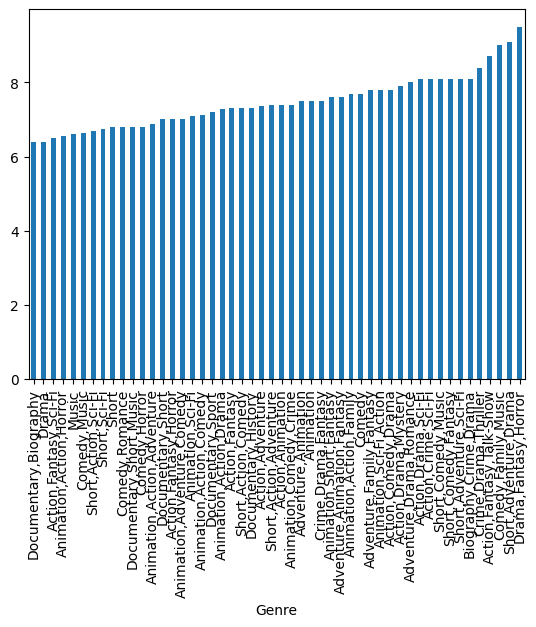

In [47]:
df.groupby('Genre')['IMDB_Score'].mean().sort_values().tail(50).plot(kind='bar')

In [49]:
df.shape

(384, 8)

In [9]:
df.columns

Index(['ID', 'film', 'Year', 'Genre', 'RunTime', 'Description', 'IMDB_Score',
       'Value_IMDB'],
      dtype='object')

In [51]:
marvel_cont=[
    "Iron Man", "Tony Stark", "Captain America", "Steve Rogers", "Thor", "Hulk",
    "Bruce Banner", "Spider-Man", "Peter Parker", "Black Widow", "Natasha Romanoff",
    "Doctor Strange", "Stephen Strange", "Black Panther", "T'Challa", "Ant-Man",
    "Scott Lang", "Captain Marvel", "Carol Danvers", "Hawkeye", "Clint Barton",
    "Scarlet Witch", "Wanda Maximoff", "Vision", "Loki", "Thanos", "Nick Fury",
    "Star-Lord", "Peter Quill", "Gamora", "Rocket Raccoon", "Groot", "Deadpool",
    "Wolverine", "Logan", "Silver Surfer", "Daredevil", "Matt Murdock", "Winter Soldier",
    "Bucky Barnes", "Avengers", "Hero", "Villain", "Superpower", "Infinity", "Asgard",
    "Shield", "Superhero", "Power", "Universe", "Battle", "Origin", "War", "Quantum",
    "Multiverse", "Technology", "Transformation", "Alliance", "Legacy", "Time",
    "Space", "Justice", "Wakanda", "Stark", "Mutant", "S.H.I.E.L.D.", "Gem", "Crossover",
    "Team", "God", "Cosmic", "Destiny", "Drax", "Jessica Jones", "Luke Cage",
    "X-Men", "Fantastic Four", "Venom", "Ghost Rider", "The Punisher", "The Eternals",
    "Blade", "Hank Pym", "Magneto"
]

DC_cont=[
    "Batman", "Superman", "Justice", "League", "Dark", "Knight", "Wonder Woman",
    "Suicide Squad", "Man of Steel", "Gotham", "Green Lantern", "Flash", "Arrow",
    "Titans", "Shazam", "Aquaman", "Joker", "Birds of Prey", "Vengeance", "Crisis",
    "Return", "Rise", "Legends", "Hero", "Dawn", "Tomorrow", "Gods", "Power",
    "World", "Origin", "Reign", "Son", "War", "Throne", "Watchmen", "Phantom",
    "Enemy", "Universe", "Blood", "Redemption", "Doomsday", "Apocalypse", "End",
    "Constantine", "Catwoman", "Jonah Hex", "Nightwing", "Robin", "Supergirl",
    "Zatanna", "Swamp Thing", "Blue Beetle", "Black Adam", "Vixen", "Harley Quinn",
    "Static Shock", "Hawkman", "Green Arrow", "Batgirl", "Superboy", "Darkseid",
    "Deathstroke", "Lobo", "Spectre", "The Question", "Red Hood", "Lucifer",
    "Steel", "Raven", "Huntress", "Booster Gold", "Mr. Terrific", "Black Canary",
    "The Atom", "Martian Manhunter", "Dr. Fate", "Black Lightning", "Firestorm",
    "Etrigan", "The Demon", "Orion", "Metamorpho", "Azrael", "Deadshot",
    "Solomon Grundy", "Doctor Manhattan"
]
def findCU(tittle):
  for keyword in marvel_cont:
    if keyword in tittle:
      return 'Marvel'
  for keyword in DC_cont:
    if keyword in tittle:
      return 'DC'
df['CU']=df['Description'].apply(findCU)
df['CU']=df['Film'].apply(findCU)

df.head(5)

KeyError: 'Film'

<Axes: xlabel='CU'>

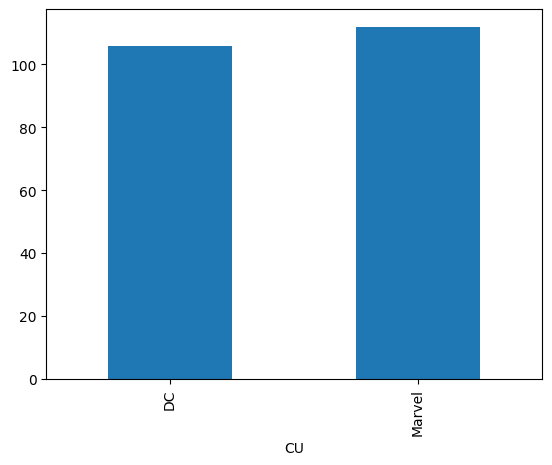

In [54]:
df.groupby('CU').size().plot(kind='bar')

<Axes: xlabel='IMDB_Score'>

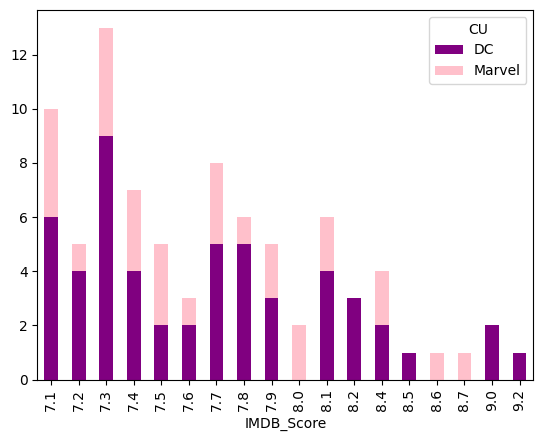

In [60]:
# Collect Movies/Tv shows in data which having IMBD score more than 7
data=df[df['IMDB_Score']>7 ]


# Display the data by making group on the basis of IMBD score and Cinematic universe
data.groupby(['IMDB_Score', 'CU']).size().unstack().plot(kind='bar', stacked=True, color=['purple', 'pink'])

<Axes: xlabel='Year'>

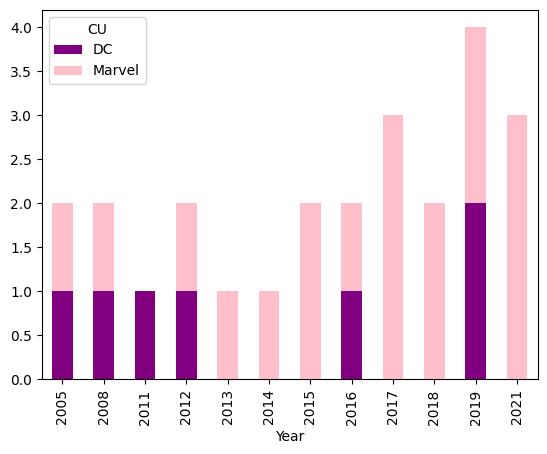

In [64]:
df['Year'] = df['Year'].astype(str)

# Replace unwanted characters like '(', ')', and '-' with an empty string
df['Year'] = df['Year'].str.replace(r'[\(\)\-]', '', regex=True)

# Convert 'Year' back to numeric values, coercing errors into NaN, and then to integers
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

data=df[(df['IMDB_Score'] > 7) & (df['Year'] > 2000) ]
data.groupby(['Year', 'CU']).size().unstack().plot(kind='bar', stacked=True, color=['purple', 'pink'])

In [52]:
df.describe()

,ID,IMDB_Score
count,384.000000,384.000000
mean,317.713542,5.885417
std,230.446181,2.515185
min,0.000000,0.000000
25%,95.750000,5.775000
50%,405.500000,6.700000
75%,501.250000,7.300000
max,1556.000000,9.500000


In [53]:
df.nunique()

ID             384
film           290
Year           134
Genre           81
RunTime        108
Description    359
IMDB_Score      50
Value_IMDB       3
CU               2
dtype: int64

In [13]:
df_copy=df

In [14]:
df_copy.head()

,ID,film,Year,Genre,RunTime,Description,IMDB_Score,Value_IMDB
0,0,Eternals,-2021,"Action,Adventure,Drama",0,"The saga of the Eternals, a race of immortal b...",0.0,Bad
1,1,Loki,(2021–2023),"Action,Adventure,Fantasy",0,A new Marvel chapter with Loki at its center.,0.0,Bad
2,2,The Falcon and the Winter Soldier,-2021,"Action,Adventure,Drama",50 min,"Following the events of 'Avengers: Endgame,' S...",7.5,Good
3,3,WandaVision,(2021),"Action,Comedy,Drama",350 min,Blends the style of classic sitcoms with the M...,8.1,Good
4,4,Spider-Man: No Way Home,-2021,"Action,Adventure,Sci-Fi",0,A continuation of Spider-Man: Far From Home.,0.0,Bad


In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           384 non-null    int64  
 1   film         384 non-null    object 
 2   Year         370 non-null    object 
 3   Genre        377 non-null    object 
 4   RunTime      384 non-null    object 
 5   Description  384 non-null    object 
 6   IMDB_Score   384 non-null    float64
 7   Value_IMDB   384 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 24.1+ KB


In [65]:
df_update = df.copy()
df_update['IMDB_Score'] = df_update['IMDB_Score'].fillna(df_update['IMDB_Score'].median())
df_update.head()

,ID,film,Year,Genre,RunTime,Description,IMDB_Score,Value_IMDB,CU
0,0,Eternals,2021,"Action,Adventure,Drama",0,"The saga of the Eternals, a race of immortal b...",0.0,Bad,None
1,1,Loki,<NA>,"Action,Adventure,Fantasy",0,A new Marvel chapter with Loki at its center.,0.0,Bad,Marvel
2,2,The Falcon and the Winter Soldier,2021,"Action,Adventure,Drama",50 min,"Following the events of 'Avengers: Endgame,' S...",7.5,Good,Marvel
3,3,WandaVision,2021,"Action,Comedy,Drama",350 min,Blends the style of classic sitcoms with the M...,8.1,Good,Marvel
4,4,Spider-Man: No Way Home,2021,"Action,Adventure,Sci-Fi",0,A continuation of Spider-Man: Far From Home.,0.0,Bad,Marvel


In [66]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           384 non-null    int64  
 1   film         384 non-null    object 
 2   Year         115 non-null    Int64  
 3   Genre        377 non-null    object 
 4   RunTime      384 non-null    object 
 5   Description  384 non-null    object 
 6   IMDB_Score   384 non-null    float64
 7   Value_IMDB   384 non-null    object 
 8   CU           218 non-null    object 
dtypes: Int64(1), float64(1), int64(1), object(6)
memory usage: 27.5+ KB


In [44]:
def f(columns):
    if columns['IMDB_Score']>=8.5:
        return 'Very Good'
    elif columns['IMDB_Score']>=7.0:
        return 'Good'
    else:
        return 'Bad'

In [45]:
df_update['Value_IMDB'] = df.apply(f,axis=1)
df_update

,ID,film,Year,Genre,RunTime,Description,IMDB_Score,Value_IMDB
0,0,Eternals,-2021,"Action,Adventure,Drama",0,"The saga of the Eternals, a race of immortal b...",0.0,Bad
1,1,Loki,(2021–2023),"Action,Adventure,Fantasy",0,A new Marvel chapter with Loki at its center.,0.0,Bad
2,2,The Falcon and the Winter Soldier,-2021,"Action,Adventure,Drama",50 min,"Following the events of 'Avengers: Endgame,' S...",7.5,Good
3,3,WandaVision,(2021),"Action,Comedy,Drama",350 min,Blends the style of classic sitcoms with the M...,8.1,Good
4,4,Spider-Man: No Way Home,-2021,"Action,Adventure,Sci-Fi",0,A continuation of Spider-Man: Far From Home.,0.0,Bad
...,...,...,...,...,...,...,...,...
379,1023,Krypto the Superdog,(2005–2006),"Animation,Action,Comedy",24 min,The Dog Stars argue as to who should take over...,8.4,Good
380,1024,Smallville,(2001–2011),"Adventure,Drama,Romance",43 min,Lionel Luthor is chased by a man with a mask a...,8.5,Very Good
381,1025,Krypto the Superdog,(2005–2006),"Animation,Action,Comedy",22 min,Krypto tells the story about how he arrived on...,7.3,Good
382,1271,Legends of the Superheroes,-1979,"Action,Comedy,Adventure",0,Ed McMahon hosts this special gathering in whi...,5.7,Bad


In [46]:
df_update.to_csv(r'marvel_fix.csv',index = False)